---
**FINAL PROJECTS - MOVIES RECOMMENDER SYSTEM**
---







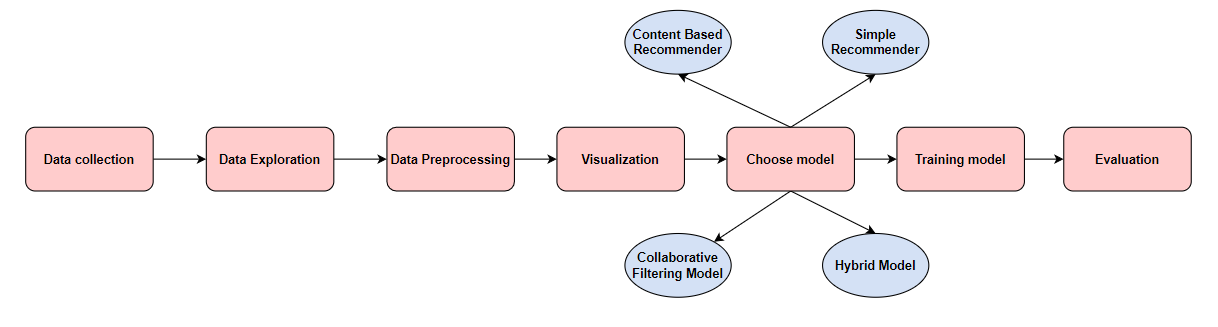

# About dataset
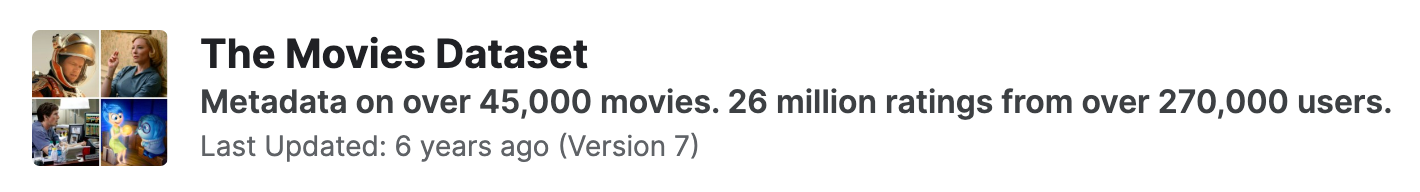

https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/input

**Bối cảnh**

Những tập tin này chứa thông tin về metadata cho tất cả 45,000 bộ phim được liệt kê trong Bộ dữ liệu Full MovieLens. Bộ dữ liệu này bao gồm các bộ phim được phát hành vào hoặc trước tháng 7 năm 2017. Các điểm dữ liệu bao gồm diễn viên, đoàn làm phim, từ khóa cốt truyện, ngân sách, doanh thu, poster, ngày phát hành, ngôn ngữ, công ty sản xuất, quốc gia, số lượng phiếu bầu TMDB và điểm bình chọn trung bình TMDB.

Bộ dữ liệu này cũng chứa các tập tin chứa 26 triệu đánh giá từ 270,000 người dùng cho tất cả 45,000 bộ phim. Đánh giá được đưa ra trên một thang điểm từ 1-5 và đã được thu thập từ trang web chính thức của GroupLens.

**Nội dung**

Bộ dữ liệu này bao gồm các tập tin sau:

- movies_metadata.csv: Tệp chính chứa thông tin về metadata của 45,000 bộ phim trong Bộ dữ liệu Full MovieLens. Các đặc điểm bao gồm poster, hình nền, ngân sách, doanh thu, ngày phát hành, ngôn ngữ, quốc gia sản xuất và công ty.

- keywords.csv: Chứa các từ khóa cốt truyện cho các bộ phim MovieLens của chúng tôi. Có sẵn dưới dạng một Object JSON được chuỗi hóa.

- credits.csv: Bao gồm thông tin về Diễn viên và Đoàn làm phim cho tất cả các bộ phim của chúng tôi. Có sẵn dưới dạng một Object JSON được chuỗi hóa.

- links.csv: Tệp chứa các ID TMDB và IMDB của tất cả các bộ phim xuất hiện trong Bộ dữ liệu Full MovieLens.

- ratings_small.csv: Tập con của 100,000 đánh giá từ 700 người dùng với 9,000 bộ phim.

# Import module

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from collections import Counter
import warnings; warnings.simplefilter('ignore')

# Load dataset

The Full Dataset: Consists of 26,000,000 ratings and 750,000 tag applications applied to 45,000 movies by 270,000 users. Includes tag genome data with 12 million relevance scores across 1,100 tags.

In [ ]:
df_movies = pd.read_csv('movies_metadata.csv')
df_credits = pd.read_csv('credits.csv')
df_keywords = pd.read_csv('keywords.csv')
df_ratings = pd.read_csv('ratings.csv')

# Understand dataset

## function

In [ ]:
def info_df(df):
    print('Shape: \n', df.shape)

    # Kiểm tra xem có giá trị trùng lặp trong trường 'id' hoặc 'userID' và 'movieId' không.
    if 'userId' in df.columns and 'movieId' in df.columns:
        # Kiểm tra giá trị trùng lặp của cột 'userID' và 'movieId'
        has_duplicate_ids = df.duplicated(['userId', 'movieId']).any()
        if has_duplicate_ids:
            print("\nCó giá trị trùng lặp trong trường 'userID' và 'movieId'\n")
        else:
            print("\nKhông có giá trị trùng lặp trong trường 'userID' và 'movieId'\n")
    elif 'id' in df.columns:
        # Kiểm tra giá trị trùng lặp của cột 'id'
        has_duplicate_ids = df.duplicated('id').any()
        if has_duplicate_ids:
            print("\nCó giá trị trùng lặp trong trường 'id'\n")
        else:
          print("\nKhông có giá trị trùng lặp trong trường 'id'\n")

    info_df = pd.DataFrame({
        'Column': df.columns,
        'Non-Null Count': df.count(),
        'Dtype': df.dtypes,
        'Missing Percentage': df.isnull().mean() * 100
    })
    return info_df.set_index('Column')

def visualize_numerical_data(df):
  # Tạo một lưới subplot với các biểu đồ cột cho các giá trị numerical
  numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
  num_subplots = len(numerical_columns)
  fig, axes = plt.subplots(nrows=1, ncols=num_subplots, figsize = (12,5))

  for i, column in enumerate(numerical_columns):
      sns.histplot(df[column], ax=axes[i], bins=20, kde=True)
      axes[i].set_title(column.title())
      axes[i].set_xlabel(column)
      axes[i].set_ylabel('Số lượng')

  plt.tight_layout()
  plt.show()

def plot_missing_values(df):
    # visualizing missing values
    plt.figure(figsize=(30,20))
    plt.subplot(234)
    sns.heatmap(pd.DataFrame(df.isnull().mean() * 100),annot=True,cmap='viridis',linewidths=1,linecolor="white")
    plt.title("Missing Value")

def plot_correlation_heatmap(df):
    # Tính ma trận tương quan
    correlation_matrix = df.corr()

    # Vẽ biểu đồ nhiệt độ (heatmap) của ma trận tương quan
    plt.figure(figsize=(12, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
    plt.title('Biểu đồ tương quan')
    plt.show()

def most_common_element_in_categorical_columns(df):
    # Tìm phần tử xuất hiện nhiều nhất trong mỗi cột categorical của DataFrame và trả về DataFrame.
    data = {'Column': [], 'Most Common Element': [], 'Count': []}

    for column in df.select_dtypes(include='object').columns:
        all_values = [value for value in df[column]]
        value_counter = Counter(all_values)
        most_common_value, count = value_counter.most_common(1)[0]
        data['Column'].append(column)
        data['Most Common Element'].append(most_common_value)
        data['Count'].append(count)

    result_df = pd.DataFrame(data).set_index('Column')
    print("Phần tử xuất hiện nhiều nhất trong mỗi cột categorical:")
    return result_df

## 1. movie_metadata dataframe

In [ ]:
df_movies.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [ ]:
df_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Feature**  
- adult: Cho biết nếu bộ phim có phân loại X-Rated hoặc dành cho người trưởng thành.

- belongs_to_collection: Một từ điển được chuyển thành chuỗi, cung cấp thông tin về loạt phim mà bộ phim cụ thể đó thuộc về.

- budget: Ngân sách của bộ phim tính bằng đô la.

- genres: Một danh sách được chuyển thành chuỗi, liệt kê tất cả các thể loại liên quan đến bộ phim.

- homepage: Trang chính thức của bộ phim.

- id: ID của bộ phim.

- imdb_id: ID của bộ phim trên trang web IMDB.

- original_language: Ngôn ngữ mà bộ phim được quay ban đầu.

- original_title: Tiêu đề gốc của bộ phim.

- overview: Một đoạn mô tả ngắn về bộ phim.

- popularity: Điểm Popularity được gán bởi TMDB.

- poster_path: Đường dẫn URL đến hình ảnh poster.

- production_companies: Một danh sách được chuyển thành chuỗi, liệt kê các công ty sản xuất tham gia vào việc làm phim.

- production_countries: Một danh sách được chuyển thành chuỗi, liệt kê các quốc gia nơi bộ phim được quay/sản xuất.

- release_date: Ngày phát hành trong các rạp chiếu phim.

- revenue: Tổng doanh thu của bộ phim tính bằng đô la.

- runtime: Thời lượng của bộ phim tính bằng phút.

- spoken_languages: Một danh sách được chuyển thành chuỗi, liệt kê các ngôn ngữ được sử dụng trong phim.

- status: Tình trạng của bộ phim (Released, To Be Released, Announced, v.v.).

- tagline: Câu khẩu hiệu của bộ phim.

- title: Tiêu đề chính thức của bộ phim.

- video: Cho biết liệu có video của bộ phim trên TMDB hay không.

- vote_average: Điểm đánh giá trung bình của bộ phim.

- vote_count: Số lượng phiếu bầu của người dùng, được đếm bởi TMDB.







In [ ]:
info_df(df_movies)

Shape: 
 (45466, 24)

Có giá trị trùng lặp trong trường 'id'



,Non-Null Count,Dtype,Missing Percentage
Column,,,
adult,45466,object,0.000000
belongs_to_collection,4494,object,90.115691
budget,45466,object,0.000000
genres,45466,object,0.000000
homepage,7782,object,82.883913
id,45466,object,0.000000
imdb_id,45449,object,0.037391
original_language,45455,object,0.024194
original_title,45466,object,0.000000


In [ ]:
most_common_element_in_categorical_columns(df_movies)

Phần tử xuất hiện nhiều nhất trong mỗi cột categorical:


,Most Common Element,Count
Column,,
adult,False,45454
belongs_to_collection,NaN,40972
budget,0,36573
genres,"[{'id': 18, 'name': 'Drama'}]",5000
homepage,NaN,37684
id,141971,3
imdb_id,NaN,17
original_language,en,32269
original_title,Alice in Wonderland,8


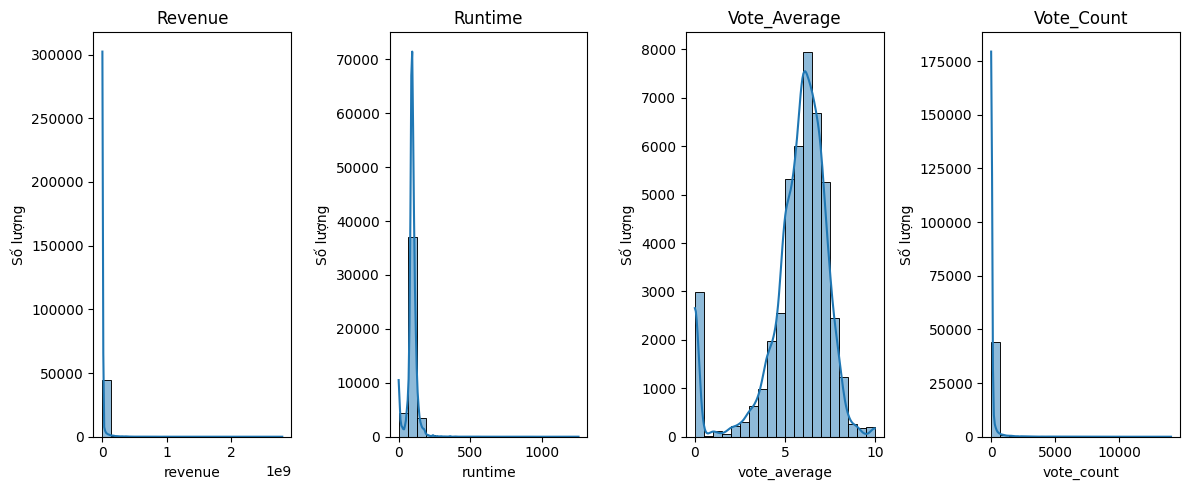

In [ ]:
visualize_numerical_data(df_movies)

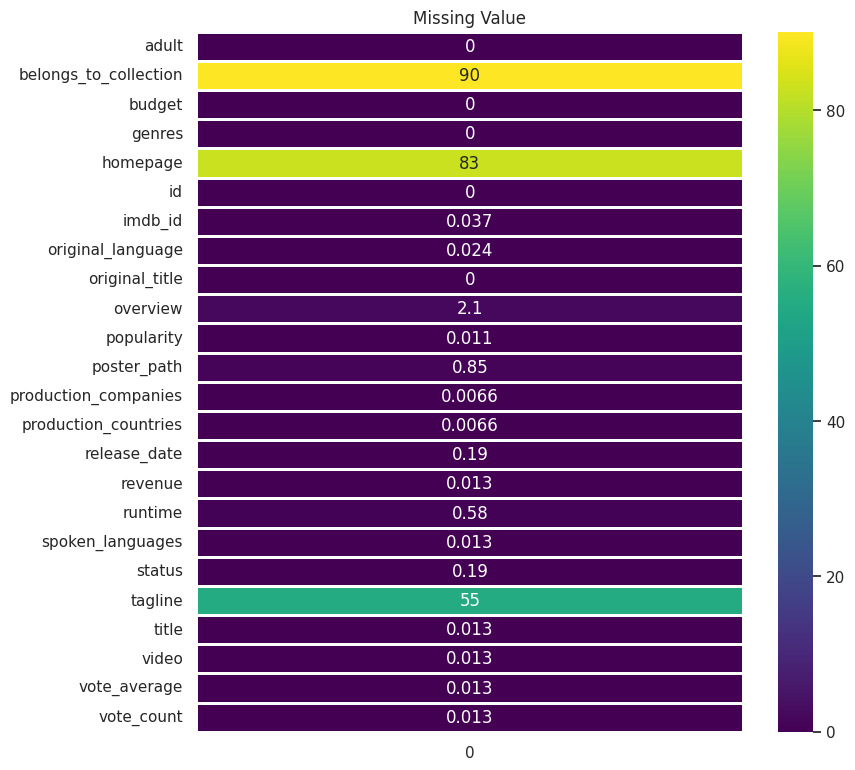

In [ ]:
plot_missing_values(df_movies)

- Có rất nhiều giá trị 0 trong cột 'revenue' và 'vote_count', có thể có nhiều lý do khác nhau mà giá trị này xuất hiện. Một trong những lý do phổ biến là trong quá trình thu thập dữ liệu, một số thông tin về doanh thu ('revenue') và số lượng phiếu bầu ('vote_count') có thể không được ghi nhận đúng và được điền bằng giá trị 0 thay vì giá trị thiếu (NaN).

- Tương tự với cột 'production_companies', trong quá trình thu thập dữ liệu, có thể có một số phim không có thông tin về các công ty sản xuất. Trong trường hợp này, giá trị [] có thể được sử dụng để thay thế cho giá trị thiếu (NaN).

- Các cột 'belongs_to_collection', 'homepage', 'tagline' có hơn 50% missing value

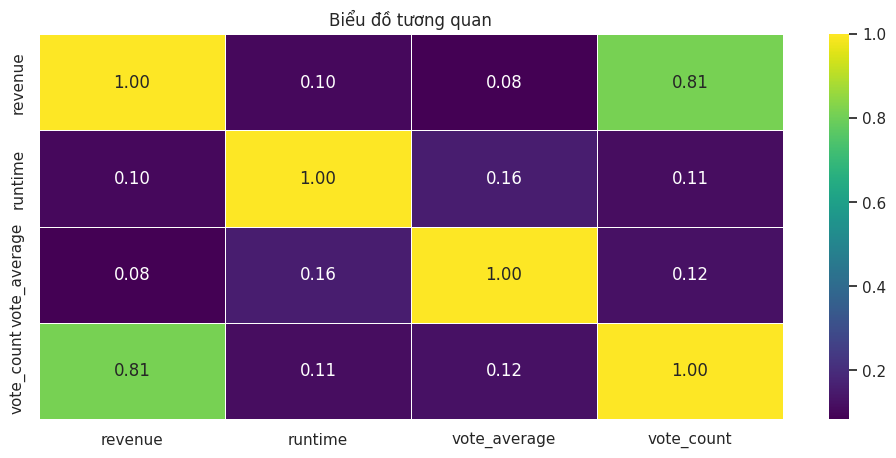

In [ ]:
plot_correlation_heatmap(df_movies)

**Tương quan giữa 'vote_count' và 'revenue':**  
- Độ tương quan giữa 'vote count' và 'revenue' là 0.81, điều này cho thấy có một mối tương quan tuyến tính mạnh giữa hai biến này. Giá trị 0.81 gần với 1, điều này chỉ ra rằng khi số lượng phiếu bầu ('vote count') tăng, doanh thu ('revenue') cũng có xu hướng tăng, và ngược lại.
- Mối tương quan mạnh này có thể được hiểu là:
  - Khi một bộ phim nhận được nhiều phiếu bầu, nó có thể thu hút sự chú ý và sự quan tâm từ khán giả, điều này có thể dẫn đến tăng cường doanh thu từ việc mọi người xem bộ phim.
  - Tuy nhiên, cần lưu ý rằng tương quan không có nghĩa là mối quan hệ nhân quả và không giải thích nguyên nhân của mối quan hệ này. Có thể có nhiều yếu tố khác nhau đồng thời ảnh hưởng đến cả 'vote count' và 'revenue'.

**Tương quan giữa 'vote_count' và 'vote_average':**  
- Giá trị 0.12 có thể chỉ ra rằng số lượng phiếu bầu ('vote count') không có tương quan mạnh với điểm đánh giá trung bình ('vote average'). Điều này có thể xảy ra khi một bộ phim có thể thu hút một số lượng lớn phiếu bầu nhưng có thể không nhất thiết có điểm đánh giá cao.
- Có thể có nhiều yếu tố khác nhau đóng vai trò trong quyết định của người xem khi đánh giá một bộ phim, không chỉ là lượng phiếu bầu.

**Tương quan giữa 'revenue' và 'vote_average':**  
- Giá trị 0.08 chỉ ra rằng doanh thu ('revenue') cũng không có tương quan mạnh với điểm đánh giá trung bình ('vote average'). Điều này có thể xảy ra khi một bộ phim có thể kiếm được nhiều doanh thu mà không nhất thiết phải có điểm đánh giá cao từ người xem.
- Một bộ phim có thể có doanh thu lớn do các yếu tố khác như chiến lược tiếp thị, dàn diễn viên nổi tiếng hoặc quảng cáo mạnh mẽ, mà không cần phải có sự đồng thuận cao từ người xem.

## 2. credits dataframe

In [ ]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
df_credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

**Feature**  
- cast: Thông tin về diễn viên. Tên diễn viên, giới tính và tên nhân vật mà họ đóng trong phim.

- crew: Thông tin về các thành viên đoàn làm phim. Chẳng hạn như người đạo diễn, biên tập viên và các vị trí khác.

- id: Đây là ID của bộ phim được cung cấp bởi TMDb (The Movie Database).

In [ ]:
info_df(df_credits)

Shape: 
 (45476, 3)

Có giá trị trùng lặp trong trường 'id'



,Non-Null Count,Dtype,Missing Percentage
Column,,,
cast,45476,object,0.0
crew,45476,object,0.0
id,45476,int64,0.0


In [ ]:
most_common_element_in_categorical_columns(df_credits)

Phần tử xuất hiện nhiều nhất trong mỗi cột categorical:


,Most Common Element,Count
Column,,
cast,[],2418
crew,[],771


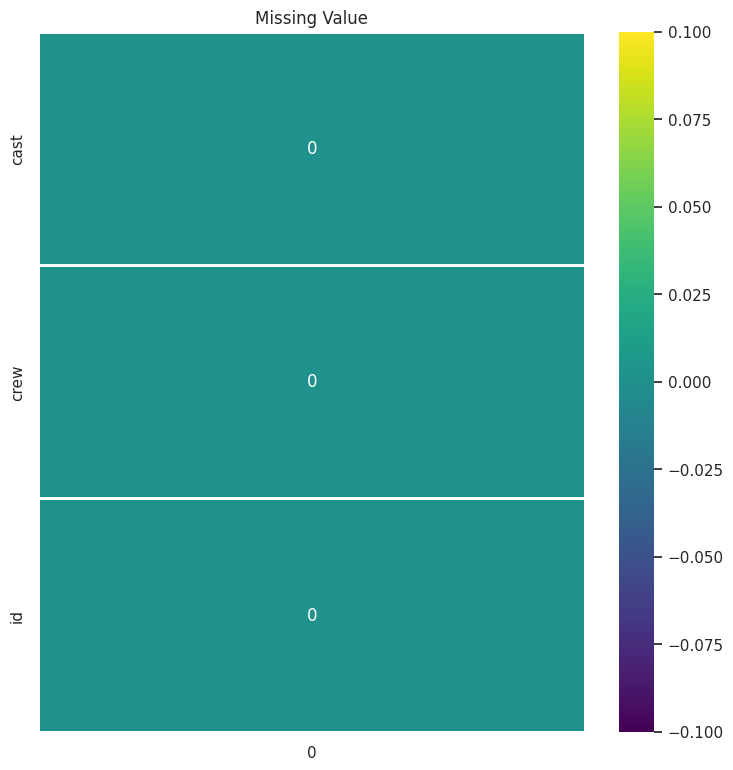

In [ ]:
plot_missing_values(df_credits)

Trong df_credits không có giá trị missing (NaN) trong các cột. Tuy nhiên, có nhiều giá trị []. Giá trị [] này biểu thị rằng cột đó không có giá trị.

Có một số lý do khác nhau khiến các giá trị [] xuất hiện trong df_credits. Một số lý do phổ biến bao gồm:

- Dữ liệu bị thiếu: Trong quá trình thu thập dữ liệu, có thể có một số phim không có thông tin về các thành viên trong đoàn làm phim. Trong trường hợp này, giá trị [] có thể được sử dụng để thay thế cho giá trị thiếu.
- Dữ liệu không chính xác: Trong một số trường hợp, thông tin về các thành viên trong đoàn làm phim có thể không chính xác. Ví dụ, một số phim có thể được báo cáo là không có bất kỳ thành viên nào trong đoàn làm phim, trong khi thực tế chúng có nhiều thành viên.
- Dữ liệu không có sẵn: Trong một số trường hợp, thông tin về các thành viên trong đoàn làm phim có thể không có sẵn cho công chúng. Ví dụ, thông tin này có thể được giữ bí mật bởi các nhà sản xuất hoặc các công ty truyền thông.

## 3. keywords dataframe

In [ ]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
df_keywords.columns

Index(['id', 'keywords'], dtype='object')

**Feature**  
- id: Đây là ID của bộ phim được cung cấp bởi TMDb (The Movie Database).

- keywords: Tags/keywords cho bộ phim. Đây là danh sách các từ khóa hoặc thẻ mô tả nội dung hoặc chủ đề của bộ phim.

In [ ]:
info_df(df_keywords)

Shape: 
 (46419, 2)

Có giá trị trùng lặp trong trường 'id'



,Non-Null Count,Dtype,Missing Percentage
Column,,,
id,46419,int64,0.0
keywords,46419,object,0.0


In [ ]:
most_common_element_in_categorical_columns(df_keywords)

Phần tử xuất hiện nhiều nhất trong mỗi cột categorical:


,Most Common Element,Count
Column,,
keywords,[],14795


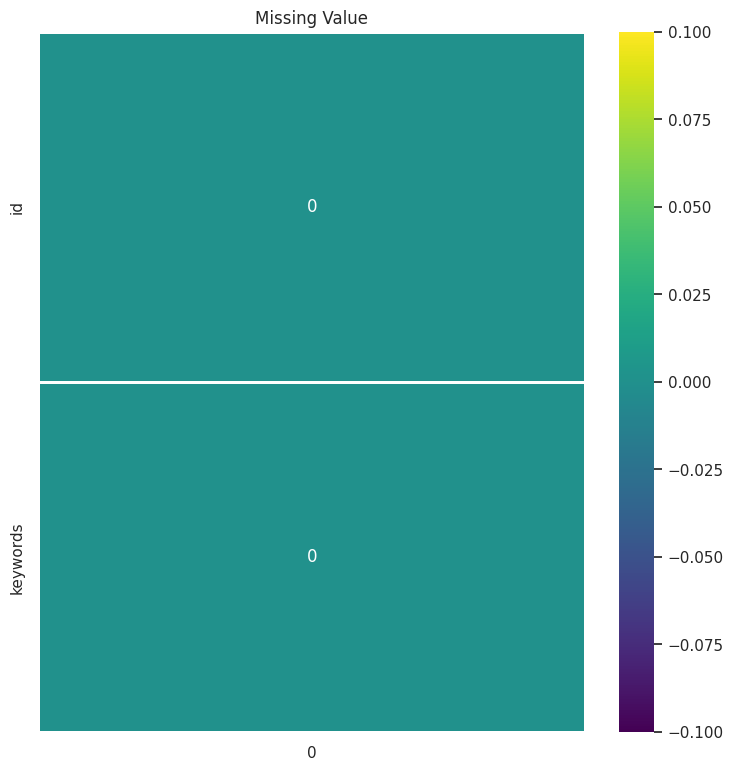

In [ ]:
plot_missing_values(df_keywords)

Trong df_keywords['keywords'] không có giá trị missing (NaN) trong các cột. Tuy nhiên, có nhiều giá trị []. Giá trị [] này biểu thị rằng cột đó không có giá trị.

## 4. ratings dataframe

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110.0,1.0,1.425942e+09
1,1,147.0,4.5,1.425942e+09
2,1,858.0,5.0,1.425942e+09
3,1,1221.0,5.0,1.425942e+09
4,1,1246.0,5.0,1.425942e+09


In [ ]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

**Feature**  
- userId: Đây là ID của người dùng.

- movieId: Đây là ID của bộ phim trên TMDb (The Movie Database).

- rating: Đánh giá được người dùng cụ thể đưa ra cho bộ phim tương ứng.

- timestamp: Thời điểm (timestamp) khi người dùng đưa ra đánh giá cho bộ phim.

In [ ]:
info_df(df_ratings)

Shape: 
 (15353609, 4)

Không có giá trị trùng lặp trong trường 'userID' và 'movieId'



,Non-Null Count,Dtype,Missing Percentage
Column,,,
userId,15353609,int64,0.000000
movieId,15353608,float64,0.000007
rating,15353608,float64,0.000007
timestamp,15353608,float64,0.000007


Do không có giá trị trùng lặp trong trường 'userID' và 'movieId'. Nên trong dataframe ratings không có user nào xem 1 bộ phim nhiều hơn 1 lần

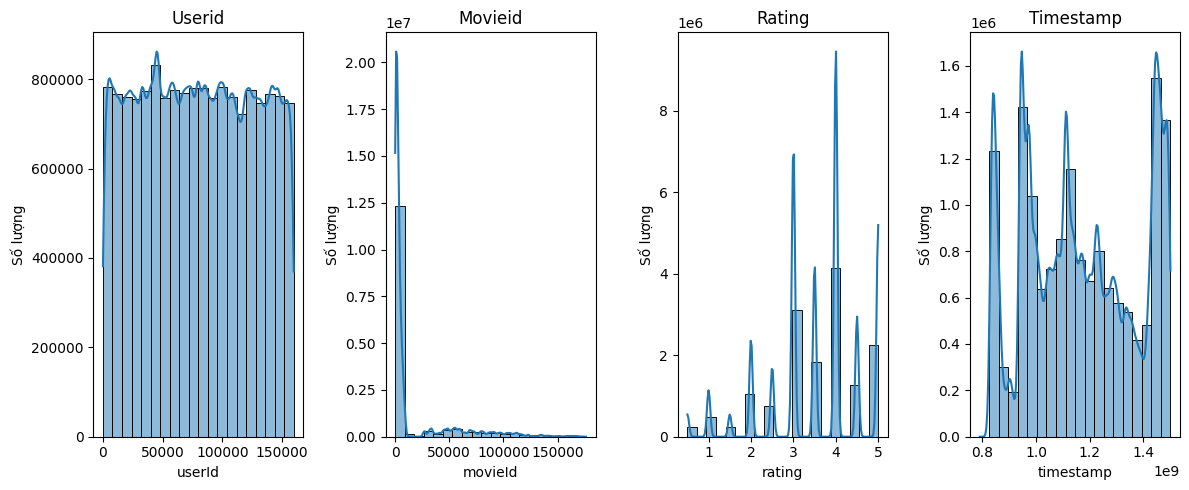

In [ ]:
visualize_numerical_data(df_ratings)

In [ ]:
# In ra 100 'title' được xếp theo thứ tự 'id' tăng dần
sorted_df = df_movies.sort_values(by='id')
selected_columns = ['title', 'vote_average', 'vote_count', 'runtime', 'release_date']
result_df = sorted_df[selected_columns].head(100)
result_df

,title,vote_average,vote_count,runtime,release_date
2429,"Lock, Stock and Two Smoking Barrels",7.5,1671.0,105.0,1998-03-05
13609,La estrategia del caracol,7.2,9.0,116.0,1993-12-25
4435,Young Einstein,4.5,46.0,91.0,1988-12-15
17451,Flight Command,6.0,1.0,116.0,1940-12-27
36946,Hounded,4.8,7.0,87.0,2006-08-06
...,...,...,...,...,...
4042,Get Over It,5.5,76.0,87.0,2001-03-08
11700,Avenue Montaigne,6.2,27.0,106.0,2006-02-15
4996,Dragonfly,6.2,209.0,104.0,2002-02-22
12373,Thunder Rock,7.3,3.0,112.0,1942-12-04


Số lượng người xem cho những phim có 'movieId' từ 0 đến 10000 là một con số lớn, đặc biệt nếu được so sánh với tổng số lượng người xem trong toàn bộ bộ dữ liệu hoặc với những phim có 'movieId' cao hơn.
Điều này có thể chỉ ra rằng nhóm các phim này có sức hấp dẫn lớn đối với khán giả, hoặc có thể được quảng bá mạnh mẽ.

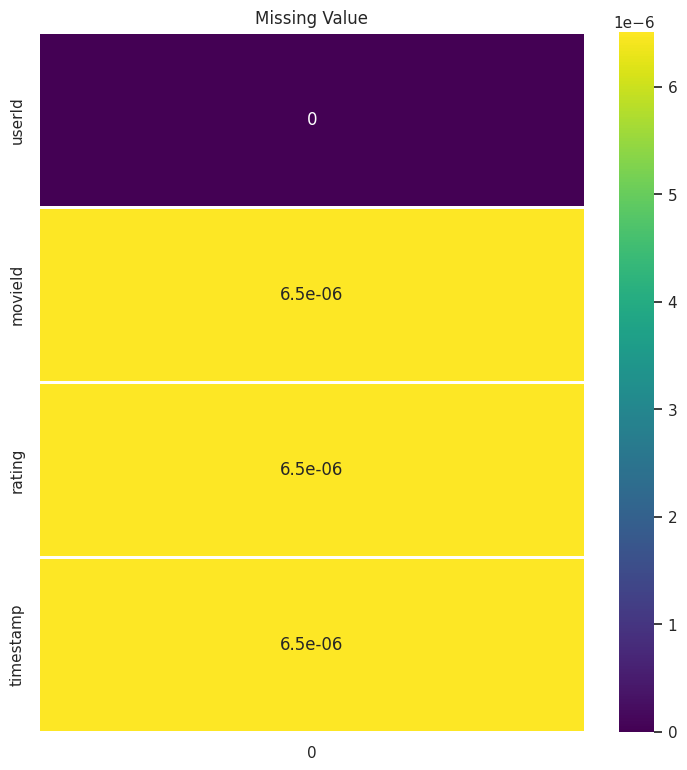

In [ ]:
plot_missing_values(df_ratings)

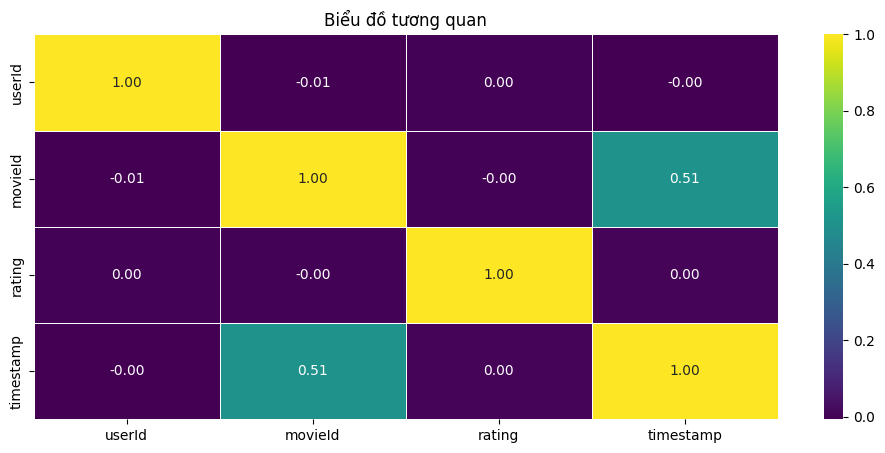

In [ ]:
plot_correlation_heatmap(df_ratings)

Độ tương quan giữa 'userId' và 'timestamp' là 0.51, điều này cho thấy có một mối tương quan tích cực tuyến tính giữa hai biến. Tăng giá trị của 'userId' thường đi kèm với sự tăng giảm của 'timestamp', và ngược lại.

Mối tương quan này có thể được giải thích bằng việc có nhiều người xem hơn theo thời gian, như bạn đã đề cập. Điều này có ý nghĩa là theo thời gian, số lượng người xem (có 'userId' khác nhau) đã tăng, điều này phản ánh sự phổ biến và sự tăng trưởng của dịch vụ xem phim.

In [ ]:
df=df_ratings

# Chuyển đổi cột 'timestamp' sang kiểu dữ liệu ngày giờ
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Giả sử 'timestamp' đang ở đơn vị giây

# Tách cột 'timestamp' thành 'ngày' và 'giờ'
df['day'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time
df['hour'] = df['timestamp'].dt.hour

In [ ]:
df.head()

,userId,movieId,rating,timestamp,day,time,hour
0,1,110.0,1.0,2015-03-09 22:52:09,2015-03-09,22:52:09,22.0
1,1,147.0,4.5,2015-03-09 23:07:15,2015-03-09,23:07:15,23.0
2,1,858.0,5.0,2015-03-09 22:52:03,2015-03-09,22:52:03,22.0
3,1,1221.0,5.0,2015-03-09 22:52:26,2015-03-09,22:52:26,22.0
4,1,1246.0,5.0,2015-03-09 22:52:36,2015-03-09,22:52:36,22.0


Text(0.5, 0, 'Giờ trong ngày')

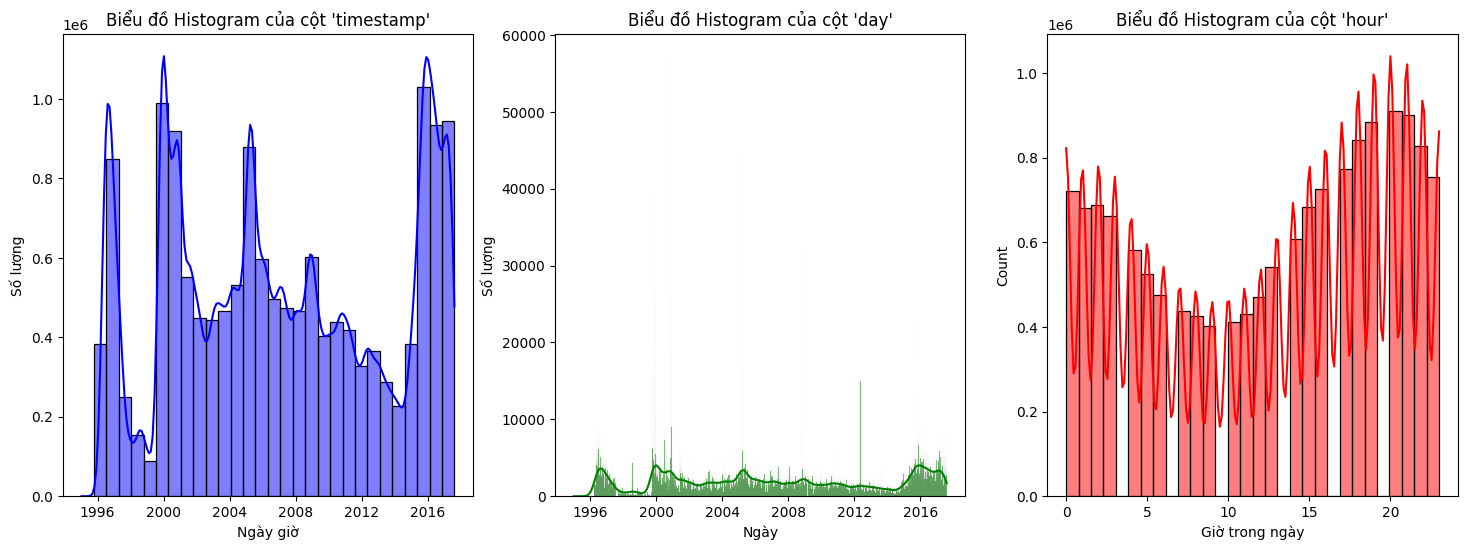

In [ ]:
# Tạo subplot cho cột 'timestamp', 'day', và 'hour'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Biểu đồ histogram cho cột 'timestamp'
sns.histplot(df['timestamp'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Biểu đồ Histogram của cột 'timestamp'")
axes[0].set_xlabel('Ngày giờ')
axes[0].set_ylabel('Số lượng')

# Biểu đồ histogram cho cột 'day'
sns.histplot(df['day'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title("Biểu đồ Histogram của cột 'day'")
axes[1].set_xlabel('Ngày')
axes[1].set_ylabel('Số lượng')

# Biểu đồ histogram cho cột 'hour'
sns.histplot(df['hour'], bins=30, kde=True, color='red', ax=axes[2])
axes[2].set_title("Biểu đồ Histogram của cột 'hour'")
axes[2].set_xlabel('Giờ trong ngày')

Dựa trên phân phối thời gian của ngày giờ xem phim, bạn có thể đưa ra những nhận xét hợp lý về thói quen xem phim của người dùng. Dưới đây là một số nhận xét có thể áp dụng:

Khung giờ xem phim: Nếu có một đỉnh lớn tại các giờ tối, có thể người xem thường xem phim vào buổi tối sau khi kết thúc công việc hoặc các hoạt động hàng ngày. Điều này có thể phản ánh thói quen giải trí sau giờ làm việc.

Mùa trong năm: Nếu có sự tăng đột ngột trong lượng xem phim ở cuối năm hoặc mùa hè, có thể đó là thời điểm mà người xem thường có nhiều thời gian rảnh hơn, chẳng hạn như trong kỳ nghỉ lễ hoặc kỳ nghỉ mùa hè.

Ngày trong tuần: Bạn cũng có thể xem xét thói quen xem phim trong các ngày cụ thể của tuần. Có thể có sự gia tăng vào cuối tuần khi mọi người có nhiều thời gian rảnh hơn so với các ngày trong tuần.